## 1D Quantum Harmonic Oscillator - Dynamic Simulation
### Case 4 - Wave packet

<br>
Dynamic simulation of the wave function given by the initial wave packet

$$ \Psi(x,0) = A \exp \left[ - \frac{(x-c)^2}{b^2} \right] \cos \left( \frac{2\pi}{s} x \right) \; $$

from time $t = 0$ to time  $t = T = 2 \pi / \omega$ and with values $b = s$ , $c = s/4$ .

This notebook contains graphs of:
* the reconstruction of the initial probability density function $|\Psi(x,0)|^2$ ,
* the evolution of the probability density function $|\Psi(x,t)|^2$ ,
* the expectation value of position $ \langle x \rangle $ as a function of time .


#### Import libraries and functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import qho_eigen as qho
from math_tools import *


#### Initialize and reconstruct initial state $\Psi(x,0)$


In [2]:
# Define physical constants
hbar = 1
M = 1
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
x_min = -10
x_max = 10
dx = 0.01
x = np.linspace(x_min, x_max, int((x_max - x_min) / dx) + 1) # np.linspace handles edges better

# Compute eigenstates
N = 30
n = np.vstack(np.arange(N), dtype=object)
eigenfuns = np.zeros((N, np.size(x)))

for i in range(N):
    eigenfuns[i] = qho.eigen1D(s, n[i][0], x)

# Initialize wave function
b = s
c = s / 4
m = s
A = (8 / (math.pi * b**2))**(1/4) / math.sqrt(1 + math.cos(4 * math.pi * c / m) * math.exp(-2 * math.pi**2 * b**2 / m**2))
psi0 = A * np.exp(-(x - c)**2 / b**2) * np.cos(2 * math.pi / m * x)

# Compute eigenstate coefficients
c = np.zeros((N, 1))

for i in range(N):
    c[i] = np.trapz(np.conj(eigenfuns[i]) * psi0, x=x)

# Reconstruct initial wave function
psi0_expand = np.sum(c * eigenfuns, axis=0)

# Verify normalization of probability density function
print(f'Integral of |Ψ(x,0)|² = {np.trapz(abs2(psi0), x=x)}')
print()

# Compute absolute error of reconstructed state
print(f'Max abs error of reconstructed |Ψ(x,0)|² = {np.max(np.abs(abs2(psi0) - abs2(psi0_expand)))}')
print()


Integral of |Ψ(x,0)|² = 1.0

Max abs error of reconstructed |Ψ(x,0)|² = 0.00023535542529351527



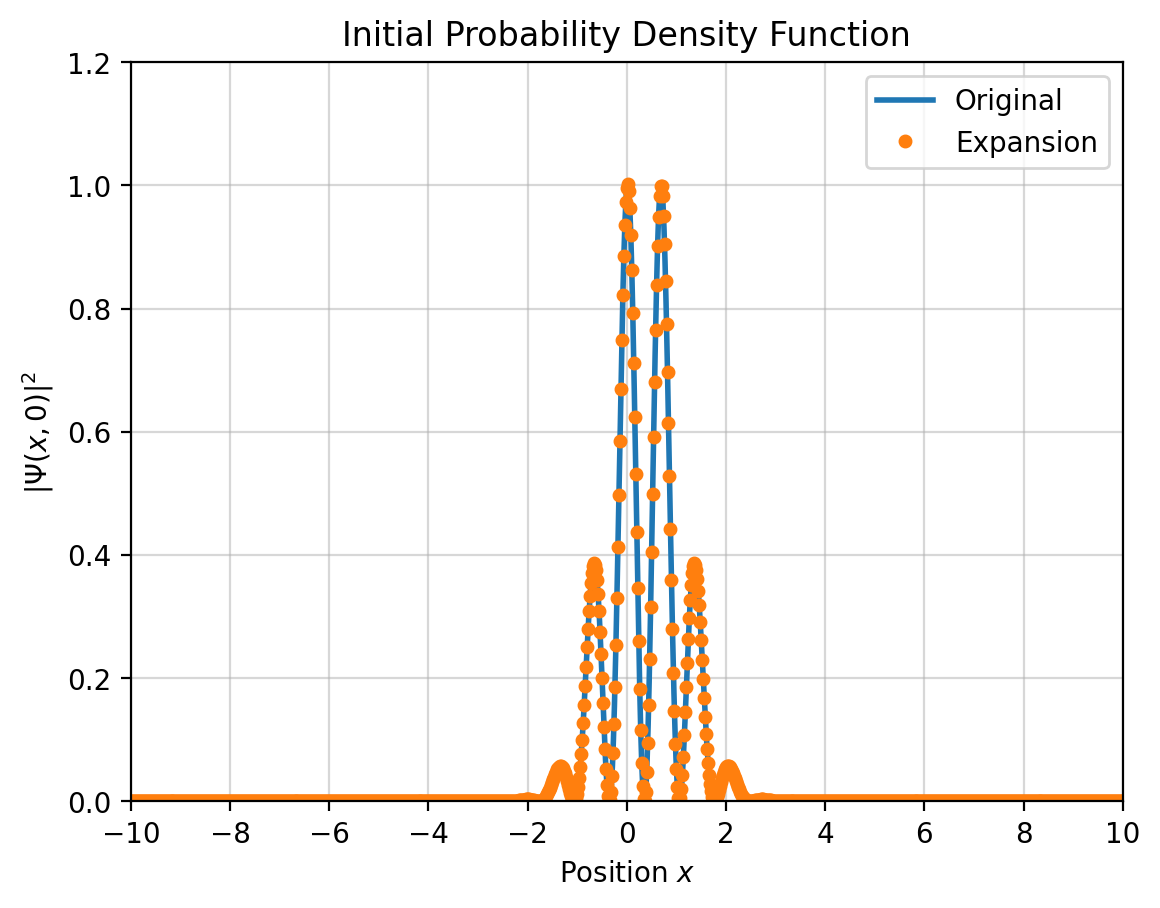

In [3]:
# Plot initial probability density function
step = 2

fig, ax = plt.subplots()
ax.plot(x, abs2(psi0), linewidth=2, label='Original')
ax.plot(x[::step], abs2(psi0_expand)[::step], '.', markersize='8', label='Expansion')
ax.set_title('Initial Probability Density Function')
ax.set_xlabel('Position $x$'), ax.set_ylabel(r'$|\Psi(x,0)|^2$')

ax.set_xlim(x_min, x_max), ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(x_min, x_max + 2, 2))
ax.grid(alpha=0.5)
ax.legend()

plt.show()


#### Time evolution of probability density function $|\Psi(x,t)|^2$


In [4]:
# Initialize time array
T = 2 * math.pi / w
t = np.linspace(0, T, 501)
dt = t[1] - t[0]

# Compute time evolution of wave function
psi = np.zeros((np.size(x), np.size(t)), dtype=np.complex128)
psi[:,0] = psi0_expand

n = n.astype(np.float64) # Update dtype outside of for loop to speed up

for i in range(np.size(t) - 1):
    psi[:,i+1] = np.sum(c * eigenfuns * np.exp(-1j * (0.5 + n) * w * t[i+1]), axis=0)


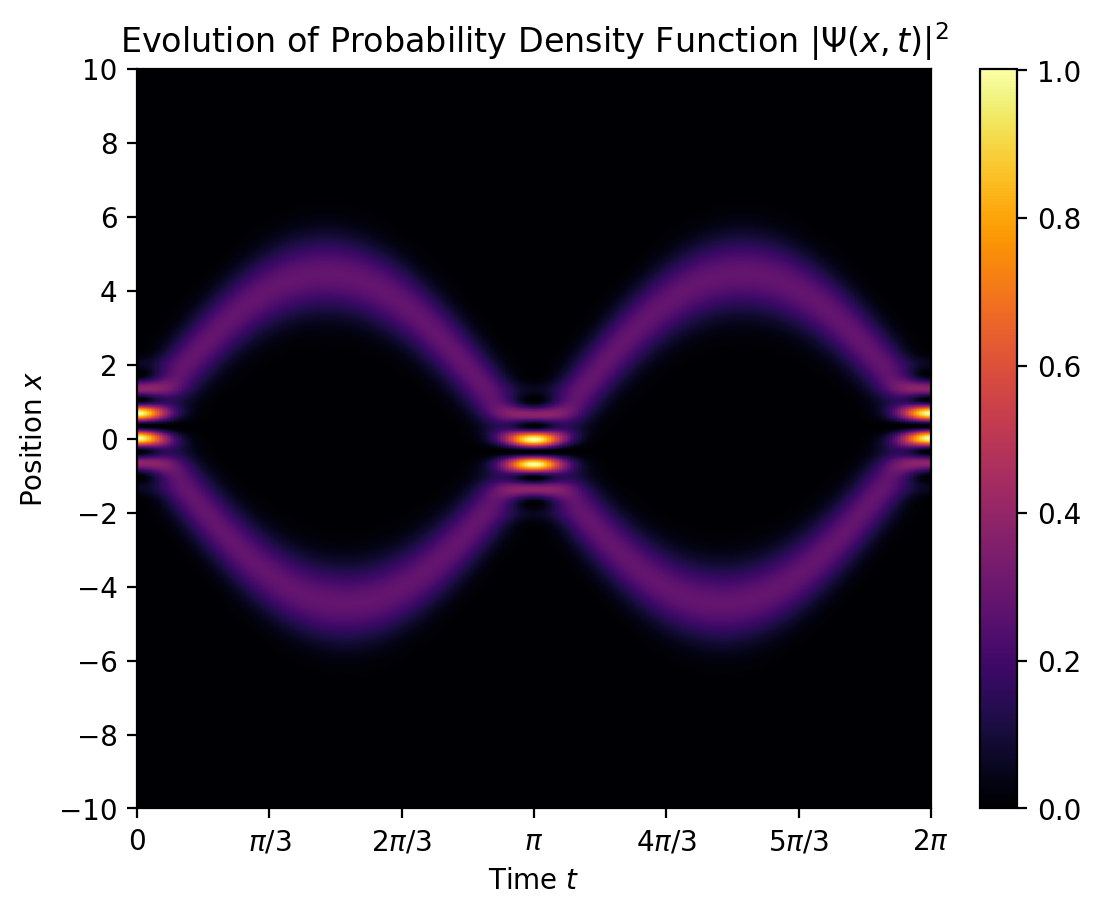

In [5]:
# Plot time evolution of probability density function
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(t, x, abs2(psi), cmap='inferno', vmin=0)
ax.set_title(r'Evolution of Probability Density Function $|\Psi(x,t)|^2$')
ax.set_xlabel('Time $t$'), ax.set_ylabel('Position $x$')

ax.set_xlim(0, T), ax.set_ylim(x_min, x_max)
ax.set_xticks(np.linspace(0, T, 7))
ax.set_xticklabels(('0', r'$\pi$/3', r'2$\pi$/3', r'$\pi$', r'4$\pi$/3', r'5$\pi$/3', r'$2\pi$'))
ax.set_yticks(np.arange(x_min, x_max + 2, 2))

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Expectation value of position $\langle x \rangle$


In [6]:
# Compute expectation value of position
expect_x = np.zeros(np.size(t))

for i in range(np.size(t)):
    expect_x[i] = np.trapz(x * abs2(psi[:,i]), x=x)


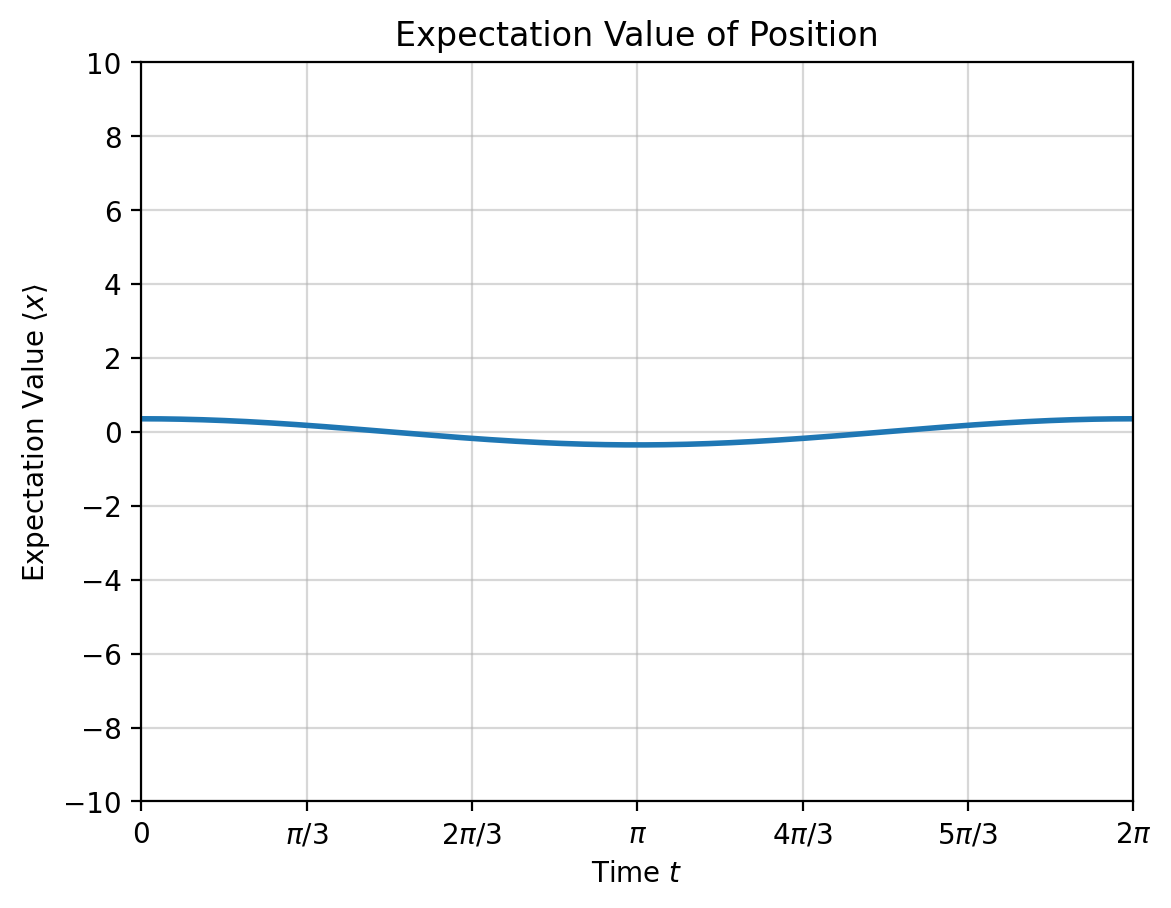

In [7]:
# Plot expectation value of position
fig, ax = plt.subplots()
ax.plot(t, expect_x, linewidth=2)
ax.set_title('Expectation Value of Position')
ax.set_xlabel('Time $t$'), ax.set_ylabel(r'Expectation Value $\langle x \rangle$')

ax.set_xlim(0, T), ax.set_ylim(x_min, x_max)
ax.set_xticks(np.linspace(0, T, 7))
ax.set_xticklabels(('0', r'$\pi$/3', r'2$\pi$/3', r'$\pi$', r'4$\pi$/3', r'5$\pi$/3', r'$2\pi$'))
ax.set_yticks(np.arange(x_min, x_max + 2, 2))
ax.grid(alpha=0.5)

plt.show()
